In [239]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# plotting!

In [240]:
df = pd.read_csv('data.csv',
                 parse_dates=[0], 
                 names=['dt','wd','n'],
                )
temp = pd.read_csv('data2.csv',
                 parse_dates=[0], 
                 names=['dt','wd','n'],
                )

df = pd.concat([df,temp])
df['date'] = [x.date() for x in df.dt]
df['time'] = [datetime.datetime.combine(datetime.date.today(), x.time()) for x in df.dt]



In [241]:
week = df.groupby('wd')
date = df.groupby('date')

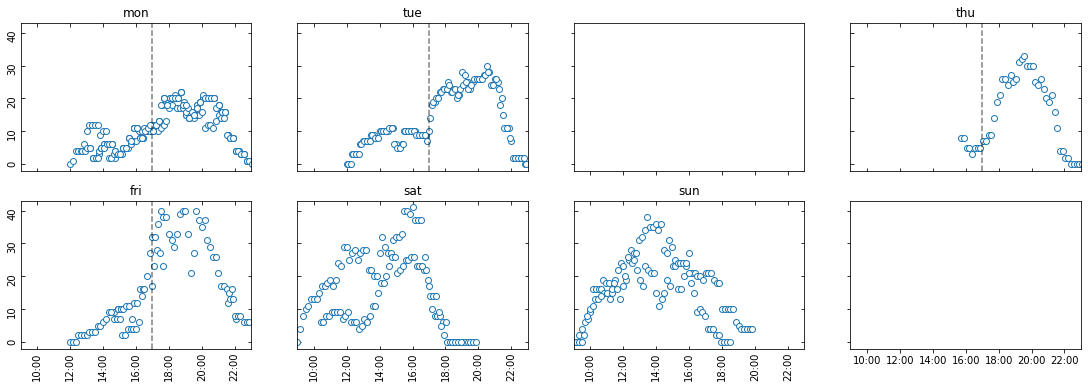

In [242]:
fig, ax = plt.subplots(2,4, figsize=(19,6),sharex=True,sharey=True)
days = [
    'mon','tue','wed','thu','fri','sat','sun'
]
ax = ax.flatten()

for w, d in week:
    ax[w].plot(d.time,d.n,'o',label=days[w],markerfacecolor='w')
    ax[w].set_title(days[w])
    ax[w].set_xlim(datetime.datetime.combine(datetime.date.today(),datetime.time(9,0)),
                   datetime.datetime.combine(datetime.date.today(),datetime.time(23,0))
                  )
    
    ax[w].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax[w].tick_params(direction='in',right=True,top=True,labelrotation=90)
    if w < 5:
        ax[w].axvline(datetime.datetime.combine(datetime.date.today(),datetime.time(17,0)),ls='--',c='k',alpha=.5)
fig.patch.set_facecolor('w')


# draft making of the scraper

In [53]:
from bs4 import BeautifulSoup
import urllib.request
import json
from csv import writer
from datetime import datetime

In [54]:
def append_list_as_row(file_name, list_of_elem):
    # Open file in append mode
    with open(file_name, 'a+', newline='') as write_obj:
        # Create a writer object from csv module
        csv_writer = writer(write_obj)
        # Add contents of list as last row in the csv file
        csv_writer.writerow(list_of_elem)

In [55]:
source = urllib.request.urlopen('https://portal.rockgympro.com/portal/public/bc4d3be86f2f8564a4e5e4f9151f6bf6/occupancy?&iframeid=occupancyCounter&fId=1837').read()
soup = BeautifulSoup(source,'html.parser') 

In [57]:
rawJ = soup.find_all('script')[2]
J = str(rawJ)
J1 = J.split("'CNP' : ")
J2 = J1[1].split(';')
J3 = J2[0].replace("\n", "")
J4 = J3.rsplit(',',1)
J5 = J4[0].replace("'",'"')

In [58]:
s = json.loads(J5)
c = s["count"]

In [59]:
now = datetime.now()
ct = now.strftime("%D %H:%M:%S")
wkd = now.weekday()

In [60]:
append_list_as_row('data.csv', [ct,wkd,c])